<a href="https://colab.research.google.com/github/Rcabrera1221/Modelo-entrenamiento/blob/main/prediccionmodeloentrenaminto_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install gdown


In [ ]:
!gdown --id 1o-ij-D8KK56L4BlfCADdubkxcQJKiSO-


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1o-ij-D8KK56L4BlfCADdubkxcQJKiSO-
To: /content/imagenes_trabajo.zip
100% 23.0M/23.0M [00:00<00:00, 136MB/s] 


In [ ]:
!unzip /content/imagenes_trabajo.zip -d /content/imagenes_descomprimidas


Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_100.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1000.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1001.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1002.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1003.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1004.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1005.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1006.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1007.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1008.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1009.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_101.png  
 extracting: /content/imagenes_descomprimidas/E/E_ori

In [ ]:
!ls /content/imagenes_descomprimidas


E  O  θ  Σ


In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [ ]:
# Ruta donde están las imágenes
ruta_imagenes = '/content/imagenes_descomprimidas'
tamano = (28, 28)  # Tamaño al que redimensionaremos las imágenes
clases = ['E', 'O', 'Σ', 'θ']  # Lista de nombres de clases

In [ ]:
# Variables para guardar imágenes y etiquetas
X = []
y = []

In [ ]:
# Cargar las imágenes desde carpetas clasificadas
for idx, clase in enumerate(clases):
    carpeta_clase = os.path.join(ruta_imagenes, clase)

# Verificar si la carpeta de la clase existe antes de iterar sobre los archivos en esa carpeta
    if os.path.exists(carpeta_clase):
        for archivo in os.listdir(carpeta_clase):
            # Verificar si el archivo tiene una extensión de imagen válida
            if archivo.endswith(('jpg', 'jpeg', 'png', 'bmp')):
                ruta_archivo = os.path.join(carpeta_clase, archivo)

                # Leer la imagen en escala de grises y redimensionarla
                imagen = imread(ruta_archivo, as_gray=True)
                imagen_redimensionada = resize(imagen, tamano)

                # Añadir la imagen redimensionada al conjunto de datos
                X.append(imagen_redimensionada)

                # Añadir la etiqueta correspondiente (0 para simbolo1, 1 para simbolo2, etc.)
                y.append(idx)

In [ ]:
# Convertir listas a arreglos numpy
X = np.array(X)
y = np.array(y)


In [ ]:
# Normalizar valores entre 0 y 1
X = X / 255.0

In [ ]:
# Añadir la dimensión de canales
X = X.reshape(-1, 28, 28, 1)

In [ ]:
Visualizar la Distribución de Clases:

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Etiquetas de clases y cantidad de muestras por símbolo
clases = ['E', 'O', 'Σ', 'θ']
cantidad_por_clase = [1250, 1250, 1250, 1250]

<BarContainer object of 4 artists>

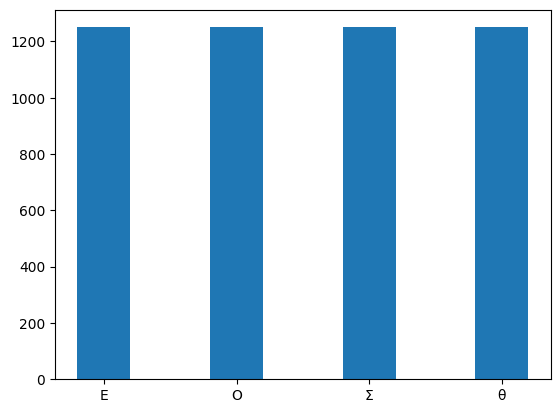

In [ ]:
# Crear el gráfico de barras
plt.figure()
plt.bar(range(len(clases)), cantidad_por_clase, tick_label=clases, width=0.4)

In [ ]:
# Definir un diccionario que mapee los operadores a etiquetas numéricas
label_map = {
    'E': 0,
    'O': 1,
    'Σ': 2,
    'θ': 3
}

In [ ]:
y = y.astype(float)

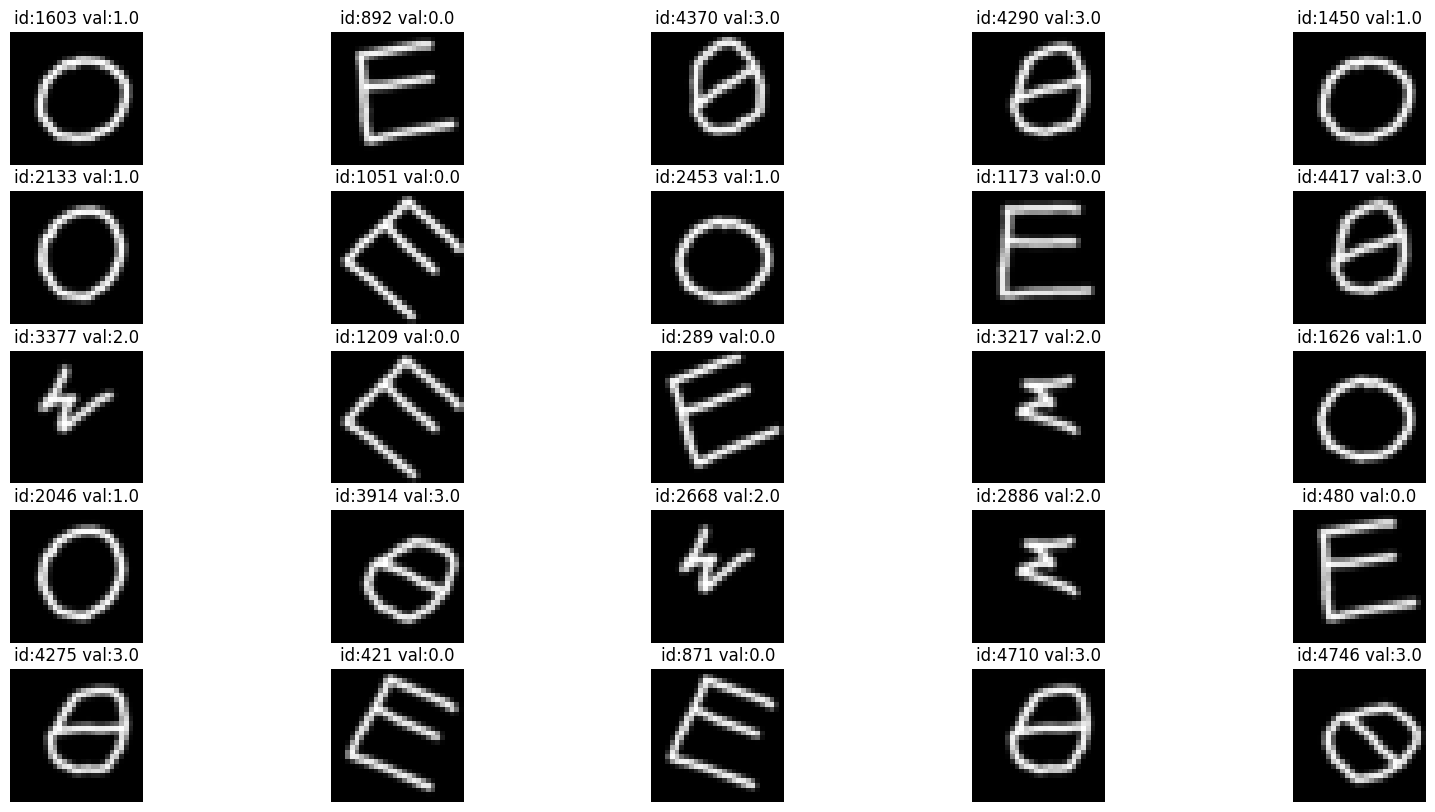

In [ ]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
# Aumento de datos avanzado
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
datagen.fit(X_train)

In [ ]:
# Crear el modelo con menos capas y mayor Dropout
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
  Dropout(0.6),  # Aumentar Dropout
  tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
  Dropout(0.6),  # Aumentar Dropout
  tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compilar el modelo con una tasa de aprendizaje ajustada
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Entrenar el modelo con early stopping
log = modelo.fit(X_train, y_train, batch_size=32,
                 validation_data=(X_test, y_test),
                 epochs=30,
                 callbacks=[early_stopping])

Epoch 1/30
126/126 [==============================] - 2s 5ms/step - loss: 1.5253 - accuracy: 0.2918 - val_loss: 1.5054 - val_accuracy: 0.4406
Epoch 2/30
126/126 [==============================] - 0s 4ms/step - loss: 1.4902 - accuracy: 0.3195 - val_loss: 1.4755 - val_accuracy: 0.4575
Epoch 3/30
126/126 [==============================] - 0s 4ms/step - loss: 1.4643 - accuracy: 0.3817 - val_loss: 1.4532 - val_accuracy: 0.5415
Epoch 4/30
126/126 [==============================] - 0s 3ms/step - loss: 1.4446 - accuracy: 0.4154 - val_loss: 1.4360 - val_accuracy: 0.5854
Epoch 5/30
126/126 [==============================] - 0s 4ms/step - loss: 1.4296 - accuracy: 0.4469 - val_loss: 1.4224 - val_accuracy: 0.6104
Epoch 6/30
126/126 [==============================] - 0s 4ms/step - loss: 1.4171 - accuracy: 0.4449 - val_loss: 1.4109 - val_accuracy: 0.6394
Epoch 7/30
126/126 [==============================] - 1s 4ms/step - loss: 1.4064 - accuracy: 0.4856 - val_loss: 1.4003 - val_accuracy: 0.6773
Epoch 

In [ ]:
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('acc')
    for ax in axes: ax.legend()

Loss     = 0.8905
Accuracy = 0.8452


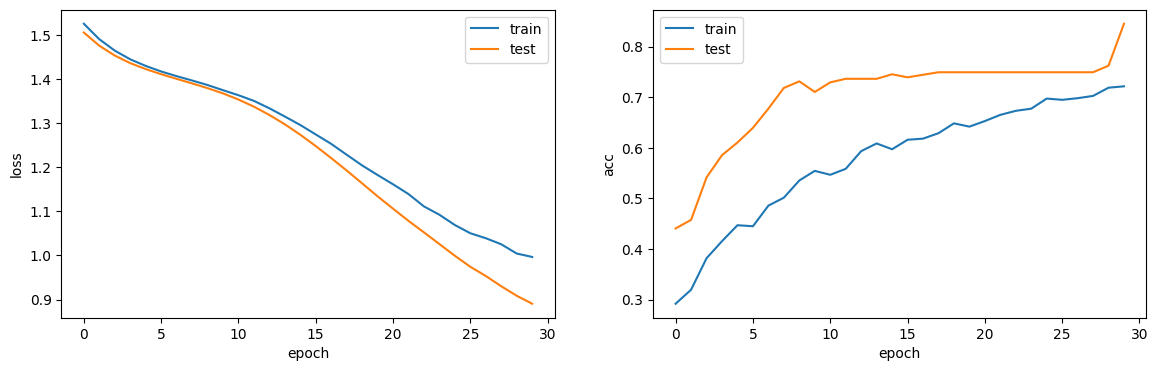

In [ ]:
show_results(modelo, log)

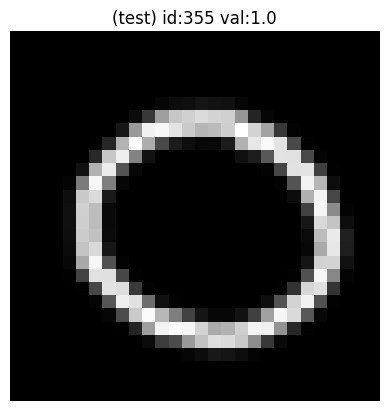

In [ ]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, label ))
plt.axis('off')
plt.imshow(-im, cmap='gray')
plt.show()

In [ ]:
salida = modelo.predict(im[None])[0]
salida

1/1 [==============================] - 0s 27ms/step


array([0.11486717, 0.62245154, 0.08451231, 0.17816906], dtype=float32)

In [ ]:

indice_max = np.argmax(salida)
valor_max = salida[indice_max]

([<matplotlib.axis.XTick at 0x7cc45a40be50>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

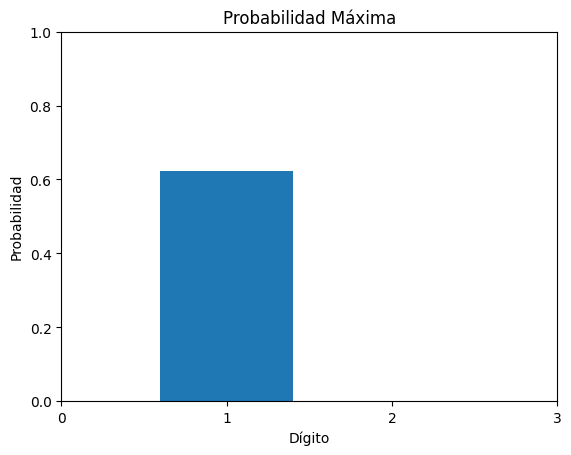

In [ ]:
# Crear la figura y el gráfico
plt.figure()
plt.title("Probabilidad Máxima")
plt.xlabel("Dígito")
plt.ylabel("Probabilidad")
plt.ylim([0, 1])
plt.bar(indice_max, valor_max)
plt.xticks(range(len(salida)))